In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 2.9 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -10
MAX_VALUE = 10
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np

def sumXExp2(x):
  sumX = 0  
  for value in x:
    sumX += np.power(value, 2)
  return sumX

def sumSinExp2Modx(x):
  sumX = 0
  for value in x:
    sumX += pow(np.sin(np.sqrt(abs(value))),2)
  return sumX

def term1Left(x):
  sum = 0
  for value in x:
    sum += pow(np.sin(value),2) - np.exp(-(sumXExp2(x)))
  return sum

def xinSheYangN4(x):
  value = term1Left(x) * np.exp(-(sumSinExp2Modx(x)))
  return (value,)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", xinSheYangN4)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg      	std      	min       	max     
0  	30    	0.0797739	0.0852801	0.00638734	0.313347
1  	183   	0.026127 	0.0284246	0.00243381	0.134756
2  	188   	0.0074878	0.00412805	0.00117807	0.0212373
3  	175   	0.00475227	0.00267842	0.00104941	0.0106104
4  	180   	0.00234234	0.00158367	0.000823707	0.00675944
5  	179   	0.00122889	0.000368262	0.000429359	0.00196491
6  	184   	0.000738192	0.000263667	0.000315318	0.00112484
7  	185   	0.000439146	0.000111089	0.000284942	0.000686725
8  	176   	0.000347684	7.22526e-05	0.000203329	0.000475648
9  	182   	0.000293291	6.94167e-05	0.000185013	0.000411182
10 	175   	0.000230411	4.51732e-05	0.000133333	0.00036714 
11 	178   	0.000197978	2.57115e-05	0.000133333	0.00025497 
12 	180   	0.000178748	2.26455e-05	0.000132141	0.00022532 
13 	179   	0.000156658	1.93303e-05	0.000132141	0.000203329
14 	180   	0.000140733	9.03835e-06	0.000128056	0.000160702
15 	182   	0.000133379	6.23572e-06	0.00012266 	0.000145966
16 	176   	0.000129184	3.80384e-06	0.0

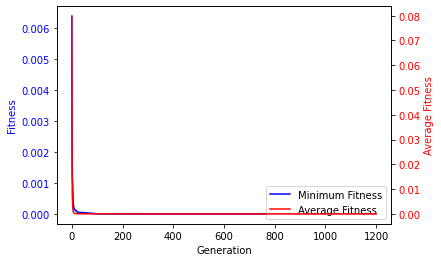

Best individual is Individual('d', [3.1440824331863215, 3.1402895780221582, 3.141652081851472, -3.141423282352826, 3.1437282792137724, -3.142301318245275, -3.141198696624344, -3.141617715475865, 3.14077830832285, 0.0002507036241752676]), fitness: (2.456882910534172e-09,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0579677	0.0639696	0.00378948	0.334785
1  	177   	0.0126036	0.00956489	0.00202766	0.0473897
2  	181   	0.00465268	0.00218646	0.00183988	0.00951395
3  	181   	0.00260854	0.00130135	0.00115978	0.00545111
4  	185   	0.00141267	0.000421199	0.000607184	0.00202766
5  	176   	0.000999491	0.000359474	0.00042265 	0.00186227
6  	181   	0.000692342	0.000134788	0.00042265 	0.000947779
7  	177   	0.000552806	0.000131789	0.000334179	0.000828845
8  	177   	0.000424966	0.000101375	0.000244901	0.000601773
9  	177   	0.000353245	6.27092e-05	0.000244901	0.000445381
10 	184   	0.000310775	5.31611e-05	0.00021554 	0.000442702
11 	178   	0.000265661	4.04772e-05	0.000215035	0.0003

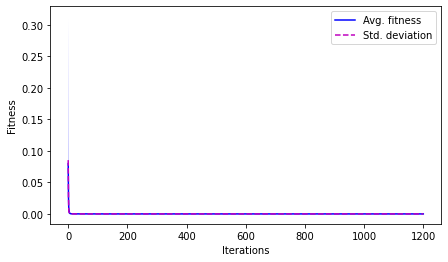

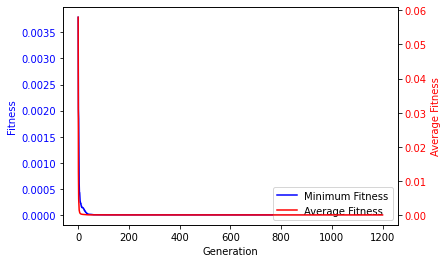

Best individual is Individual('d', [-3.141277878183643, 3.142006886262949, 3.140570144192713, -3.1418172318270052, -3.1407573004453266, -3.1415373021563884, -3.141140787296147, 3.141836910511636, 3.1376916423230994, -3.141662123280326]), fitness: (1.1895674820143707e-09,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0487167	0.0486179	0.00328235	0.169657
1  	182   	0.0193456	0.0187774	0.00303521	0.0812103
2  	177   	0.00622364	0.00329457	0.00303521	0.0150384
3  	181   	0.00384189	0.00197447	0.00103423	0.00971826
4  	186   	0.0025951 	0.000976221	0.000740446	0.00445929
5  	191   	0.00178545	0.000726555	0.000740446	0.0036517 
6  	176   	0.00117737	0.000376137	0.000479153	0.00195732
7  	186   	0.000838284	0.000162149	0.000400652	0.00103423
8  	176   	0.000703588	0.000131055	0.000443257	0.00103423
9  	179   	0.000582304	0.000103962	0.000381544	0.000843823
10 	182   	0.000489693	9.47347e-05	0.000309311	0.000709254
11 	183   	0.000409824	8.17569e-05	0.000276255	0.000598457


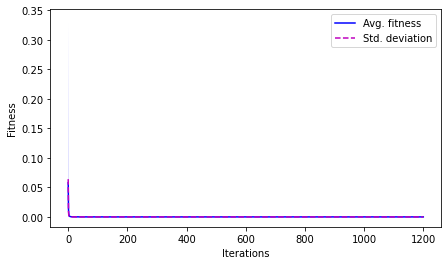

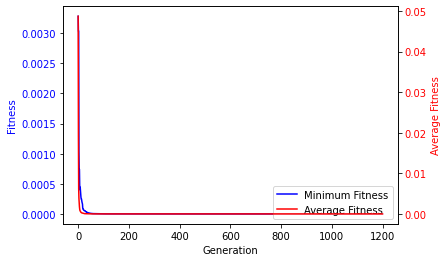

Best individual is Individual('d', [3.138735275143354, -3.141118184563902, 3.138653326722811, 3.1391018532814092, 3.1416600342020162, 3.142462942855301, 3.1411150022058676, -3.142185228715427, 3.1403807445931355, -3.142573200263111]), fitness: (1.8295477573317611e-09,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0603846	0.0497786	0.00875158	0.214543
1  	174   	0.0259036	0.0181742	0.00764031	0.104176
2  	179   	0.0142173	0.0066025	0.00541738	0.0316229
3  	179   	0.00889434	0.00368953	0.00294613	0.0194276
4  	186   	0.00524981	0.00188714	0.00102499	0.00952884
5  	182   	0.00374276	0.001419  	0.0011044 	0.00764031
6  	182   	0.00254878	0.000891294	0.000777462	0.00457193
7  	180   	0.00169595	0.000599966	0.000556083	0.00263822
8  	184   	0.00106924	0.000473847	0.000504184	0.00236111
9  	178   	0.00072165	0.000159238	0.000545804	0.0011648 
10 	177   	0.000581514	8.82721e-05	0.000428892	0.000868  
11 	183   	0.000498684	5.9257e-05 	0.000398752	0.000596708
12 	182   	0.000

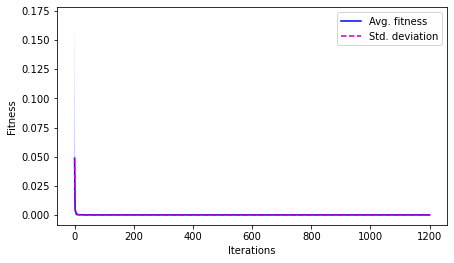

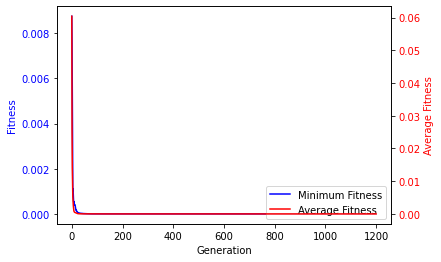

Best individual is Individual('d', [3.1401571482770794, 3.142176304164341, -3.146418967270697, 3.1416196198574675, 3.1458174804035117, 3.1404704204512046, 3.1411267873186954, 3.141901871066861, -3.141599839696379, 3.142047342610294]), fitness: (3.0758146829713996e-09,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0446263	0.0553229	0.00201264	0.251559
1  	180   	0.0173977	0.0120225	0.00201264	0.0427434
2  	187   	0.00871858	0.00448679	0.00205575	0.0231799
3  	182   	0.00485632	0.00241723	0.00107467	0.00922907
4  	180   	0.00232672	0.00138732	0.000394112	0.00538507
5  	180   	0.0011367 	0.000503324	0.000332828	0.00247585
6  	183   	0.000760703	0.000362633	0.000290933	0.00172576
7  	185   	0.000383248	0.000143436	0.000227223	0.000804884
8  	185   	0.00026629 	5.8542e-05 	0.000134227	0.000387429
9  	182   	0.000196363	4.48684e-05	0.000111108	0.000289093
10 	182   	0.000151198	3.65952e-05	0.000108735	0.000226438
11 	178   	0.000126161	3.02241e-05	7.83714e-05	0.000190592
1

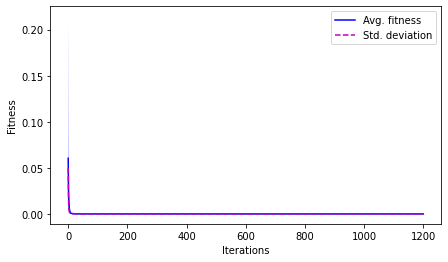

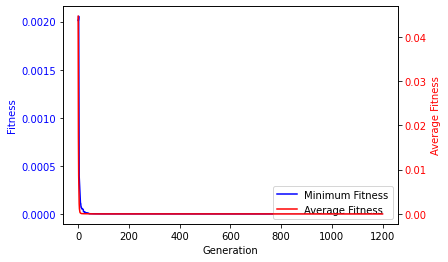

Best individual is Individual('d', [3.1407179944643477, -3.1415251940585955, 3.141545802995506, 3.1411424897296314, -3.1420167628973035, 3.1414320596651413, 3.140742347641129, -3.1416446179606714, 3.143559333674488, -3.141348113470745]), fitness: (3.955442423945871e-10,)


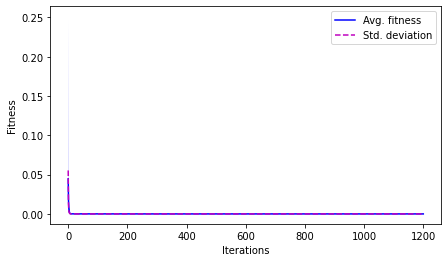

In [11]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    

    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))

    plt.figure(1, figsize=(7, 4))
    plt.plot(logbook.select('avg'), 'b-', label='Avg. fitness')
    plt.fill_between(range(len(logbook)), logbook.select('max'), logbook.select('min'), facecolor='blue', alpha=0.47)
    plt.plot(logbook.select('std'), 'm--', label='Std. deviation')
    plt.legend(frameon=True)
    plt.ylabel('Fitness'); plt.xlabel('Iterations');
    
    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()